In [11]:
# import packages
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from numpy import random as npr

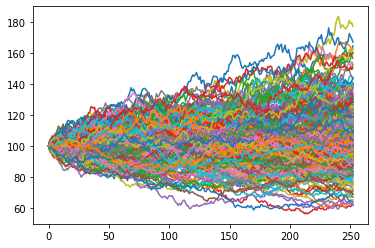

In [12]:
# Geometric Brownian Motion by Eule-Maruyama
def gbm_path(S0,mean,volatility,T=1,t=252,N=1000):
    S = np.zeros((t,N))
    dt = T/t
    mu = mean
    sigma = volatility
    S[0] = S0
    for i in range(1,t):
        phi = npr.normal(0,1,N)
        S[i] = S[i-1] * (1 + mu * dt + sigma * np.sqrt(dt) * phi)
    return S
# Phlot GBM function
def plot_path(df,t=252):
    x = np.linspace(0,t,t)
    for i in range(0,t):
        plt.plot(x,df[::,i])
df = gbm_path(100,0.05,0.2,1,252,1000)
plot_path(df)

In [13]:
def mv_path(S0,mean,volatility,T=1,t=252,N=100,k=1):
    S = np.zeros((t,N))
    dt = T/t
    mu = mean
    sigma = volatility
    S[0] = np.log(S0)
    #alpha = mu
    alpha = mu - ((sigma ** 2) / (2*k))
    for i in range(1,t):
        phi = npr.normal(0,1,N)
        S[i] = S[i-1] + k * (alpha - S[i-1]) * dt + sigma * phi * np.sqrt(dt)
    return S


In [14]:
def plot_path(df,t=252):
    x = np.linspace(0,t,t)
    for i in range(0,t):
        plt.plot(x,df[::,i])
#def mv_path(S0,mean,volatility,T=1,t=252,N=1000,k=1):
#df = mv_path(100,90,10,1,10,100)
df = mv_path(58.37,0.0065,1.3677e-02,1,254,1000,6.616e-05)

0.9303283744229228

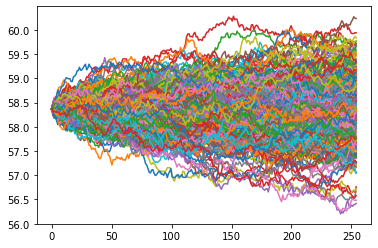

In [15]:
S0,mean,volatility,T,t,N,k = 58.37,0.0065,1.3677e-02,1,254,1000,6.616e-05
alpha = mean - ((volatility ** 2) / (2*k))
#df = mv_path(10,10,3,1,252,10000)
plot_path(np.exp(df),254)

# Estimated - theorectical mean
np.mean(np.exp(df)) - np.exp(-k*t)*S0 + (1-np.exp(-k*t))*alpha


In [16]:
#rho,delta, gamma
i = 100
j = 100
V = np.zeros((100,100))
r,t,T = 0.03, 0,10
S = 100
K =90
V[0] = K * np.exp(-r * (T-t))
V[::,-1] = max(S-K)
V[-1] = 0
for n in range(1,i-1):
    for m in range(1,j-1):



IndentationError: expected an indented block (2088254981.py, line 14)

In [ ]:
dt, ds, sigma
a = 1 + r * dt + (sigma ** 2) * (dt / (ds ** 2))
b = -(r - 0.5 * (sigma**2) * (dt / (2 * ds)) - 0.5 * (sigma **2) * (dt / (ds ** 2)))
c = (r - 0.5 * (sigma**2) * (dt / (2 * ds)) - 0.5 * (sigma **2) * (dt / (ds ** 2)))
#V[

In [ ]:
l = np.zeros((100,100))
for i in range(1,100-1):
    for j in range(1,100):
        l[i][j] = 1
l

19937110.64448422

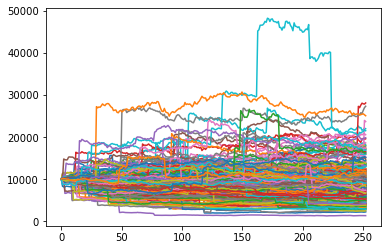

In [95]:
def mjd_path(S0,mean,volatility,T=1,t=252,N=1000,LAMBDA=1 ,jumpmean=0,jumpvol=0):
    S = np.zeros((t,N))
    dt = T/t
    mu = mean
    sigma = volatility
    muj = jumpmean
    sigma_j = jumpvol
    S[0] = S0
    k = np.exp(muj + sigma_j ** 2 / 2) - 1
    for i in range(1,t):
        phi = npr.normal(0,1,N)
        poi_rv = npr.poisson(LAMBDA * dt,N) * npr.normal(muj,sigma_j,N)
        #poi_rv = npr.normal(muj,sigma_j,N)
        norm_rv = (mu - sigma ** 2 / 2 - LAMBDA * k) * dt + sigma * phi * np.sqrt(dt)
        S[i] = S[i-1] * np.exp(norm_rv + poi_rv)

    return S
df = mjd_path(10000,0.02,0.2,1,252,1000,LAMBDA=3,jumpmean=0,jumpvol=0.3)
plot_path(df)
np.mean(df)
df.var()

Expected value of MJD
$$
\[
\mathbb{E}[S_t] = S_0 \exp\left[ \left( \mu - \frac{\sigma^2}{2} - \lambda \kappa \right)t + \lambda t \kappa \right]
\]
$$

In [96]:
np.mean(df)
k = np.exp(0 + 0.3 ** 2 / 2) - 1
np.exp(0.02 * 252 + 252* k)
#expected value of MJD
S0, mu, sigma, t, lam, mu_j, sigma_j  = 10000,0.02,0.2,252,3,0,0.3
k = np.exp(mu_j + sigma_j ** 2 / 2) - 1
mean_MJD = S0 * np.exp((mu - lam* k - sigma**2/2)*t + lam*t*k)
#mean_MJD = S0 * np.exp((mu - lam* k - sigma**2/2)*t + lam*mu_j)
print(mean_MJD)
var_MJD = S0 * np.exp(t * sigma**2 + sigma_j** 2)
print(var_MJD)

10000.0
261080767.64026538


In [80]:
(mu - lam* k - sigma**2/2)*t
lam*t*k


34.79706209099